###installing required packages

In [1]:
pip install -q numpy >=1.25.0

In [2]:
pip install -q pandas==2.0.3


In [3]:
pip install --pre pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5

In [4]:
pip install imbalaced-learn -q

ERROR: Could not find a version that satisfies the requirement imbalaced-learn (from versions: none)
ERROR: No matching distribution found for imbalaced-learn


In [5]:
pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.4 MB/s eta 0:00:00


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import time
import shap



###Auto ML with pycaret Primary Data

PyCaret is an open-source, low-code Python machine learning library that automates machine learning workflows, making experimentation faster and more efficient.

With the help of Pycaret in both basic  data modes, we were able to find a baseline for the models we want to build ourselves.

In [7]:
from pycaret.classification import *

In [8]:
df = pd.read_csv('/content/16325569497737558 (3).csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
setup(df,target = 'output', session_id=85, remove_outliers = True)

,Description,Value
0,Session id,85
1,Target,output
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(292, 14)"
5,Transformed train set shape,"(201, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [11]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8587,0.9136,0.9030,0.8583,0.8724,0.7118,0.7279,1.1040
nb,Naive Bayes,0.8582,0.9238,0.8659,0.8814,0.8554,0.7150,0.7338,0.1670
ridge,Ridge Classifier,0.8496,0.9065,0.8848,0.8621,0.8630,0.6932,0.7147,0.2550
lda,Linear Discriminant Analysis,0.8496,0.9065,0.8848,0.8621,0.8630,0.6932,0.7147,0.2730
rf,Random Forest Classifier,0.8491,0.9263,0.8674,0.8726,0.8586,0.6938,0.7114,0.4640
et,Extra Trees Classifier,0.8307,0.9155,0.8402,0.8718,0.8428,0.6559,0.6785,0.4390
lightgbm,Light Gradient Boosting Machine,0.8026,0.9047,0.8333,0.8219,0.8185,0.5980,0.6148,0.2190
xgboost,Extreme Gradient Boosting,0.8024,0.8941,0.8227,0.8373,0.8145,0.5983,0.6235,0.2020
ada,Ada Boost Classifier,0.7974,0.8702,0.7970,0.8299,0.8028,0.5911,0.6049,0.2520
qda,Quadratic Discriminant Analysis,0.7926,0.8913,0.7962,0.8270,0.8001,0.5801,0.5961,0.1820


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=85, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


type of chest pain (cp)➡

Value 1: direct heart pain

Value 2: Indirect pain that leads to feeling pain in the heart

Value 3: non-cardiac pain

Value 4: No symptoms

Number of major veins (ca) ➡ A value from zero to three

blood fat (chol)

High fasting blood sugar - diabetes (fbs) ➡ It has a value of one
Zero value: none

The result of the resting ECG (rest_ecg) ➡

Zero value: normal

Value one: the ST segment of the ECG is abnormal

Value two: Probably or definitely the left ventricle is large

maximum heart rate (thalach)

Does the pain start with a specific activity?  (exng) ➡

Number one means yes

Zero means no




In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [15]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###Handling missing value

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There is no missing value in the dataset.

###Handling outliers

In [45]:
df1 = df.copy()

In [40]:
import plotly.express as px
import numpy as np

def Handle_outlier(dataframe):
    for column in dataframe.columns:
        fig = px.box(dataframe, x=column)
        fig.update_layout(width=800, height=600)
        fig.show()

        # Calculate the lower and upper bounds for outlier detection
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers from the DataFrame
        dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

    return dataframe

In [53]:
df1 = Handle_outlier(df1)

In [54]:
df1.shape

(228, 14)

###Handle imbalance data

In [55]:
df1['output'].value_counts().reset_index()

,output,count
0,1,132
1,0,96


In [56]:
fig = px.pie(df1, names='output', title='output distribution')


fig.show()

As it is known, the data is balanced.

###Model building

In [57]:
X = df1.drop(columns = 'output')
y = df1['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (205, 13)
shape of y train: (205,)
shape of x test: (23, 13)
shape of y train: (23,)


In [59]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2


In [60]:
y_train.head()

295    0
139    1
75     1
192    0
45     1
Name: output, dtype: int64

In [61]:
sc = MinMaxScaler()
#X_train_scaled = sc.fit_transform(X_train)
#y_train_scaled = sc.fit_transform(y_train)
#X_test_scaled = sc.transform(X_test)
#y_test_scaled = sc.transform(y_test)

X_train_Scale = sc.fit_transform(X_train)
X_test_Scale = sc.transform(X_test)
X_train_Scaled_df = pd.DataFrame(X_train_Scale, columns=X_train.columns)
X_test_Scaled_df = pd.DataFrame(X_test_Scale, columns=X_test.columns)

y_train_scaled = sc.fit_transform(y_train.to_frame())
y_test_scaled = sc.transform(y_test.to_frame())

In [62]:
X_test_Scaled_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.234043,1.0,0.0,0.210526,0.157205,0.0,0.0,0.228070,1.0,0.500,0.5,0.0,1.0
1,0.531915,1.0,0.0,0.210526,0.327511,0.0,0.0,0.175439,1.0,0.000,0.5,0.5,0.5
2,0.744681,1.0,1.0,1.000000,0.419214,0.0,0.0,0.587719,0.0,0.150,0.5,0.0,1.0
3,0.127660,1.0,0.0,0.421053,0.659389,0.0,0.0,0.596491,1.0,0.000,1.0,0.0,1.0
4,0.297872,1.0,0.0,0.342105,0.200873,0.0,0.0,0.280702,1.0,0.625,0.5,0.0,1.0


In [63]:
def heart_attack_prediction(model, training_x,testing_x, training_y, testing_y):
    start = time.time()
    model.fit(training_x,training_y)
    y_pred = model.predict(testing_x)
    cl_rep = classification_report(testing_y, y_pred)

    accuracy = accuracy_score(testing_y, y_pred)
    precision = precision_score(testing_y, y_pred)
    recall = recall_score(testing_y, y_pred)
    f1 = f1_score(testing_y, y_pred)

    y_pred_train = model.predict(training_x)
    accuracy_train = accuracy_score(training_y, y_pred_train)
    precision_train = precision_score(training_y, y_pred_train)
    recall_train = recall_score(training_y, y_pred_train)
    f1_train = f1_score(training_y, y_pred_train)


    explainer = shap.Explainer(model.predict,testing_x)
    shap_values = explainer(testing_x)
    shap.plots.bar(shap_values)
    #confusion matrix for training set
    conf_matrix = confusion_matrix(training_y, y_pred_train)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix for training set')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')

    plt.show()
    #confusion matrix for testing set
    conf_matrix = confusion_matrix(testing_y,y_pred)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix for testing set')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')

    plt.show()

    end = time.time()

    print(f"(Accuracy) in the training set is {accuracy_train:.4f} for {model} model.")

    print(f"(Precision) in the training set is {precision_train:.4f} for {model} model.")
    print(f"(Recall) in the training set is {recall_train:.4f} for {model} model.")
    print(f"(F1-score) in the training set is {f1_train:.4f} for {model} model.")


    print(f"(Accuracy) in the testing set is {accuracy:.4f} for {model} model.")
    print(f"(Precision) in the testing set is {precision:.4f} for {model} model.")
    print(f"(Recall) in the testing set is {recall:.4f} for {model} model.")
    print(f"(F1-score) in the testing set is {f1:.4f} for {model} model.")

    print(f"Runtime of the program is: {end - start:0.2f}")

###Model 1: Decision tree

###Hyperparameters tuning

In [64]:
param_grid1 = {'criterion': ['gini', 'entropy'],
               'splitter': ['best', 'random'],
               'max_depth': [3, 5, 7, 9]}

dt_model = DecisionTreeClassifier()
grid1 = GridSearchCV(estimator=dt_model, param_grid=param_grid1, scoring='f1', n_jobs=-1, cv=10, verbose=2)
grid1.fit(X_train_Scaled_df, y_train_scaled)
y_pred = grid1.predict(X_test_Scaled_df)
cl_rep = classification_report(y_test_scaled, y_pred)




accuracy = accuracy_score(y_test_scaled, y_pred)
precision = precision_score(y_test_scaled, y_pred)
recall = recall_score(y_test_scaled, y_pred)
f1 = f1_score(y_test_scaled, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

Fitting 10 folds for each of 16 candidates, totalling 160 fits
(Accuracy) in the testing set is : 0.7826
(Precision) in the testing set is: 0.8750
(Recall): in the testing set is: 0.6364
(F1-score): in the testing set is: 0.7368


In [65]:
grid1.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None,
                       splitter='random')

###Model 2: RandomForest

In [67]:
param_grid2 = {'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': [5, 8, 12],
               'n_estimators':[20, 30, 50],
               }

rf_model = RandomForestClassifier()
grid2 = GridSearchCV(estimator=rf_model, param_grid=param_grid2, scoring='f1', n_jobs=-1, cv=10, verbose=0)
grid2.fit(X_train_Scaled_df, y_train_scaled)
y_pred = grid2.predict(X_test_Scaled_df)
cl_rep = classification_report(y_test_scaled, y_pred)




accuracy = accuracy_score(y_test_scaled, y_pred)
precision = precision_score(y_test_scaled, y_pred)
recall = recall_score(y_test_scaled, y_pred)
f1 = f1_score(y_test_scaled, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

(Accuracy) in the testing set is : 0.8261
(Precision) in the testing set is: 0.8889
(Recall): in the testing set is: 0.7273
(F1-score): in the testing set is: 0.8000


In [72]:
param_grid3 = {'criterion': ['friedman_mse', 'squared_error'],
               'max_depth': [3, 5, 8],
               'learning_rate' : [0.1, 0.01, 0.001],
               'n_estimators':[20, 30, 50]
               }

xgb_model = GradientBoostingClassifier()
grid3 = GridSearchCV(estimator=xgb_model, param_grid=param_grid3, scoring='f1', n_jobs=-1, cv=10, verbose=0)
grid3.fit(X_train_Scaled_df, y_train_scaled)
y_pred = grid3.predict(X_test_Scaled_df)
cl_rep = classification_report(y_test_scaled, y_pred)




accuracy = accuracy_score(y_test_scaled, y_pred)
precision = precision_score(y_test_scaled, y_pred)
recall = recall_score(y_test_scaled, y_pred)
f1 = f1_score(y_test_scaled, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

(Accuracy) in the testing set is : 0.8261
(Precision) in the testing set is: 0.8182
(Recall): in the testing set is: 0.8182
(F1-score): in the testing set is: 0.8182


In [74]:
grid3.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='squared_error', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=20, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [77]:
param_grid4 = {'criterion': ['squared_error'],
               'max_depth': [8, 10, 15],
               'learning_rate' : [0.1],
               'n_estimators':[30, 50, 100]
               }

xgb_model = GradientBoostingClassifier()
grid4 = GridSearchCV(estimator=xgb_model, param_grid=param_grid4, scoring='f1', n_jobs=-1, cv=10, verbose=0)
grid4.fit(X_train_Scaled_df, y_train_scaled)
y_pred = grid4.predict(X_test_Scaled_df)
cl_rep = classification_report(y_test_scaled, y_pred)




accuracy = accuracy_score(y_test_scaled, y_pred)
precision = precision_score(y_test_scaled, y_pred)
recall = recall_score(y_test_scaled, y_pred)
f1 = f1_score(y_test_scaled, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

(Accuracy) in the testing set is : 0.9130
(Precision) in the testing set is: 0.8462
(Recall): in the testing set is: 1.0000
(F1-score): in the testing set is: 0.9167


In [78]:
grid4.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='squared_error', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=15,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=50, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [80]:
param_grid5 = {'criterion': ['squared_error'],
               'max_depth': [2, 5, 7, 10, 13],
               'learning_rate' : [0.1],
               'n_estimators':[10, 20, 30, 40]
               }

xgb_model = GradientBoostingClassifier()
grid5 = GridSearchCV(estimator=xgb_model, param_grid=param_grid5, scoring='f1', n_jobs=-1, cv=10, verbose=0)
grid5.fit(X_train_Scaled_df, y_train_scaled)
y_pred = grid5.predict(X_test_Scaled_df)
cl_rep = classification_report(y_test_scaled, y_pred)




accuracy = accuracy_score(y_test_scaled, y_pred)
precision = precision_score(y_test_scaled, y_pred)
recall = recall_score(y_test_scaled, y_pred)
f1 = f1_score(y_test_scaled, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

(Accuracy) in the testing set is : 0.9130
(Precision) in the testing set is: 0.9091
(Recall): in the testing set is: 0.9091
(F1-score): in the testing set is: 0.9091


In [81]:
grid5.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='squared_error', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=30, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [82]:
param_grid6 = {'criterion': ['squared_error'],
               'max_depth': [2, 5, 7, 10, 13],
               'learning_rate' : [0.1],
               'n_estimators':[10, 20, 30, 40],
               'subsample' : [0.0, 0.3, 0.5, 0.8, 1.0],

               }

xgb_model = GradientBoostingClassifier()
grid6 = GridSearchCV(estimator=xgb_model, param_grid=param_grid6, scoring='f1', n_jobs=-1, cv=10, verbose=0)
grid6.fit(X_train_Scaled_df, y_train_scaled)
y_pred = grid6.predict(X_test_Scaled_df)
cl_rep = classification_report(y_test_scaled, y_pred)




accuracy = accuracy_score(y_test_scaled, y_pred)
precision = precision_score(y_test_scaled, y_pred)
recall = recall_score(y_test_scaled, y_pred)
f1 = f1_score(y_test_scaled, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

(Accuracy) in the testing set is : 0.7826
(Precision) in the testing set is: 0.8000
(Recall): in the testing set is: 0.7273
(F1-score): in the testing set is: 0.7619


Based on grid_search results, we build our model.

In [83]:
model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='squared_error', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=30, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

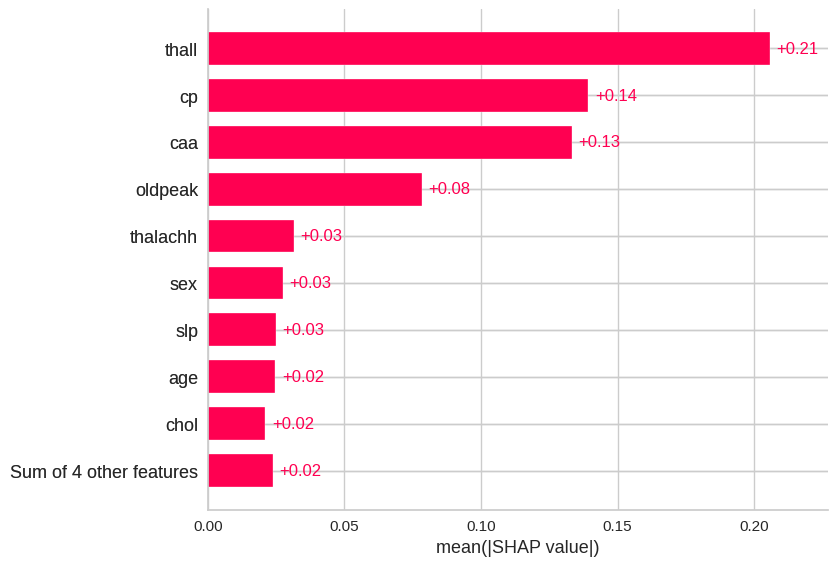

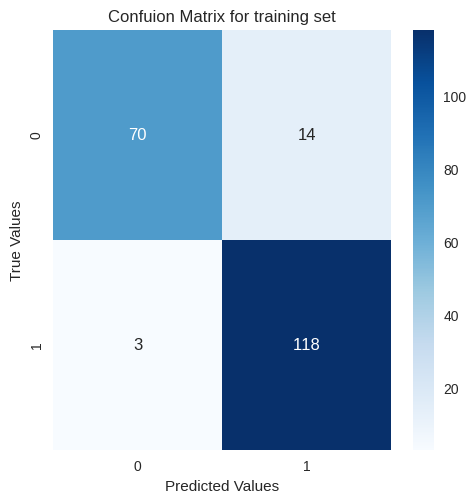

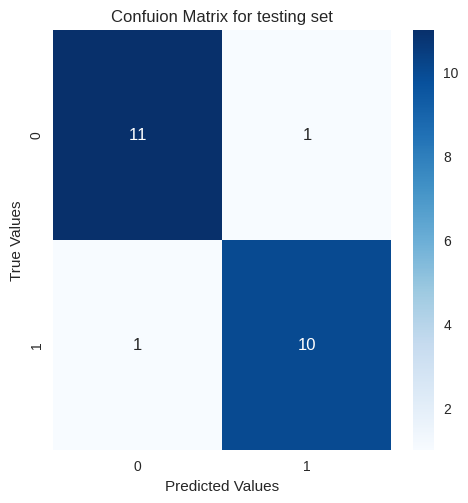

(Accuracy) in the training set is 0.9171 for GradientBoostingClassifier(ccp_alpha=0.0, criterion='squared_error', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=30, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) model.
(Precision) in the training set is 0.8939 for GradientBoostingClassifier(ccp_alpha=0.0, criterion='squared_error', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, mi

In [84]:
heart_attack_prediction(model, X_train_Scaled_df,X_test_Scaled_df, y_train_scaled, y_test_scaled)

As you can see, we created an xgboost model and were able to reach f1_score equal to 0.9328 in train data and f1_score equal to 0.9091 in test data. Also, with the help of the shap package, we were able to understand the most important factors of heart attack, the first factor of which is thall, which somehow indicates the quality of blood flow to the heart. The next factor is cp, which indicates the type of chest pain, and the third factor is caa, which refers to a type of congenital violation in the heart muscle.
